In [33]:
## One Hot Encoding
from sklearn.preprocessing import LabelEncoder
## train test split
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [34]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/DSA4266_Tundra")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('merged_data.csv')

In [36]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [37]:
df['seq'] = df['sequence'].str[1:6]

In [38]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,AGACC
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,AGACC
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,AGACC
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,AGACC
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,AGACC


In [39]:
df_le = df.copy()
holder = df_le["seq"].values.reshape(-1, 1)

label_encoder = LabelEncoder()

temp = pd.DataFrame(label_encoder.fit_transform(holder))

df_le = df_le.join(temp)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
df_le = df_le.drop(["sequence", "seq"], axis=1)

In [41]:
df_le.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,0
0,ENST00000000233,244,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,4
1,ENST00000000233,244,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,4
2,ENST00000000233,244,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,4
3,ENST00000000233,244,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,4
4,ENST00000000233,244,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,4


In [42]:
train, test = train_test_split(df_le, test_size=0.2)

In [43]:
len(train)

8821684

In [44]:
len(test)

2205422

In [45]:
len(train[train['label'] == 0])

8421722

In [46]:
len(train[train['label'] == 1])

399962

In [47]:
399415/8422269

0.0474236811956493

       transcript_position  -1_flank_length   -1_flank_std  -1_flank_mean  \
count        799321.000000    799321.000000  799321.000000  799321.000000   
mean           1333.228972         0.008229       4.488592     113.495578   
std            1100.590755         0.005477       2.564581      10.848577   
min               3.000000         0.001660       0.136000      73.200000   
25%             612.000000         0.004340       2.590000     107.000000   
50%            1065.000000         0.006710       3.730000     116.000000   
75%            1779.000000         0.010300       5.840000     121.000000   
max           18680.000000         0.094300     185.000000     150.000000   

       central_length    central_std   central_mean  +1_flank_length  \
count   799321.000000  799321.000000  799321.000000    799321.000000   
mean         0.008227       5.180576     113.157018         0.007186   
std          0.005372       2.913038      12.326431         0.004464   
min          0.001

<Axes: >

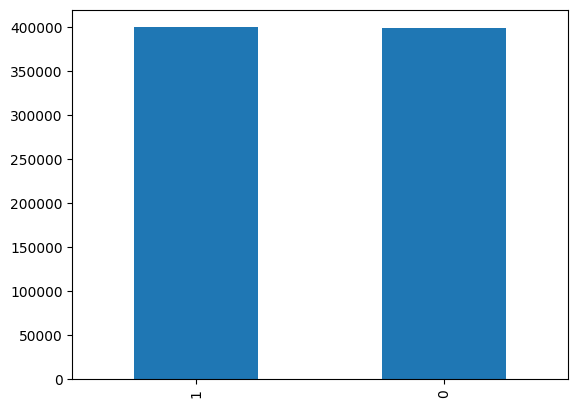

In [48]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.95258 * len(train[train['label'] == 0]))

# Get the indices of negative samples
negative_indices = train.index[train['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
train = train.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
train.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(train.describe())
train['label'].value_counts().plot(kind='bar')

In [49]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,0
0,ENST00000616577,974,0.00303,3.11,117.0,0.00935,5.51,124.0,0.00664,2.83,83.1,ENSG00000133112,1,11
1,ENST00000274065,363,0.00697,1.76,110.0,0.01030,3.13,111.0,0.00474,2.31,94.9,ENSG00000145425,0,2
2,ENST00000316292,2623,0.01530,3.46,107.0,0.00607,8.82,115.0,0.01100,3.13,77.3,ENSG00000156508,0,16
3,ENST00000503064,147,0.02360,8.46,124.0,0.00930,15.00,104.0,0.00423,3.32,80.2,ENSG00000243678,1,10
4,ENST00000245960,1415,0.02720,3.36,111.0,0.00232,8.11,121.0,0.00664,8.21,83.2,ENSG00000101224,0,16


In [50]:
train.to_csv('train_data_new.csv', index=False)
test.to_csv('test_data_new.csv', index=False)